<a href="https://colab.research.google.com/github/MaLuisa7/data_processing_and_classification_MasterDS/blob/main/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 4:
 Hacer un ejercicio para encontrar correlaciones en sus datos. Pueden utilizar los ejemplos de los links. Explicar sus hallazgos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re
%matplotlib inline
import os

import seaborn as sns
import string
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from concurrent.futures import ProcessPoolExecutor
import multiprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path_root = "/content/drive/MyDrive/procesamiento_clasificacion_datos/"

In [6]:
data = pd.read_csv(path_root +  "data_con_stopwords_20231005.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw
0,0,0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.00,Stuning even non-gamer : This sound track beau...,58
1,1,1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.75,The best soundtrack ever anything . : I 'm rea...,67
2,2,2,Amazing!: This soundtrack is my favorite music...,1,760,129,4.899225,189.50,Amazing ! : This soundtrack favorite music tim...,115
3,3,3,Excellent Soundtrack: I truly like this soundt...,1,743,118,5.305085,185.00,Excellent Soundtrack : I truly like soundtrack...,112
4,4,4,"Remember, Pull Your Jaw Off The Floor After He...",1,481,87,4.540230,95.40,"Remember , Pull Your Jaw Off The Floor After H...",77


In [7]:
data['Length_sw'] = data['no_stopwords'].str.len()

In [8]:
data['mean_word_length_sw'] = data['no_stopwords'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

In [9]:
data['mean_sent_length_sw'] = data['no_stopwords'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

In [10]:
data.head(10)

,Unnamed: 0.1,Unnamed: 0,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw,Length_sw,mean_word_length_sw,mean_sent_length_sw
0,0,0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.000000,Stuning even non-gamer : This sound track beau...,58,322,4.568966,45.142857
1,1,1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.750000,The best soundtrack ever anything . : I 'm rea...,67,367,4.492537,91.000000
2,2,2,Amazing!: This soundtrack is my favorite music...,1,760,129,4.899225,189.500000,Amazing ! : This soundtrack favorite music tim...,115,622,4.417391,154.750000
3,3,3,Excellent Soundtrack: I truly like this soundt...,1,743,118,5.305085,185.000000,Excellent Soundtrack : I truly like soundtrack...,112,639,4.714286,159.000000
4,4,4,"Remember, Pull Your Jaw Off The Floor After He...",1,481,87,4.540230,95.400000,"Remember , Pull Your Jaw Off The Floor After H...",77,388,4.051948,76.800000
5,5,5,an absolute masterpiece: I am quite sure any o...,1,825,142,4.816901,205.500000,absolute masterpiece : I quite sure actually t...,104,604,4.817308,150.250000
6,6,6,"Buyer beware: This is a self-published book, a...",0,738,139,4.316547,104.571429,"Buyer beware : This self-published book , want...",109,563,4.174312,79.571429
7,7,7,Glorious story: I loved Whisper of the wicked ...,1,522,105,3.980952,57.222222,Glorious story : I loved Whisper wicked saints...,64,341,4.343750,37.000000
8,8,8,A FIVE STAR BOOK: I just finished reading Whis...,1,524,103,4.097087,74.000000,A FIVE STAR BOOK : I finished reading Whisper ...,70,369,4.285714,51.857143
9,9,9,Whispers of the Wicked Saints: This was a easy...,1,301,63,3.793651,74.500000,Whispers Wicked Saints : This easy read book m...,42,208,3.976190,51.250000


In [ ]:
cols = ['y', 'Length', 'Word_count',  'mean_word_length', 'mean_sent_length',   'Word_count_sw',
       'Length_sw', 'mean_word_length_sw', 'mean_sent_length_sw']
data1 = data.loc[:, cols]
data1.head()

,y,Length,Word_count,mean_word_length,mean_sent_length,Word_count_sw,Length_sw,mean_word_length_sw,mean_sent_length_sw
0,1,426,80,4.337500,60.00,58,322,4.568966,45.142857
1,1,509,97,4.257732,126.75,67,367,4.492537,91.000000
2,1,760,129,4.899225,189.50,115,622,4.417391,154.750000
3,1,743,118,5.305085,185.00,112,639,4.714286,159.000000
4,1,481,87,4.540230,95.40,77,388,4.051948,76.800000


In [ ]:
data1_sample = data1.sample(frac= 0.001)
data1_sample.y.value_counts()
# sns.pairplot(data1_sample, hue="y", diag_kind="hist")
n_sample = 400
balanced_df=data1.groupby('y',as_index = False,group_keys=False).apply(lambda s: s.sample(n_sample,replace=True))


0    2063
1    1937
Name: y, dtype: int64

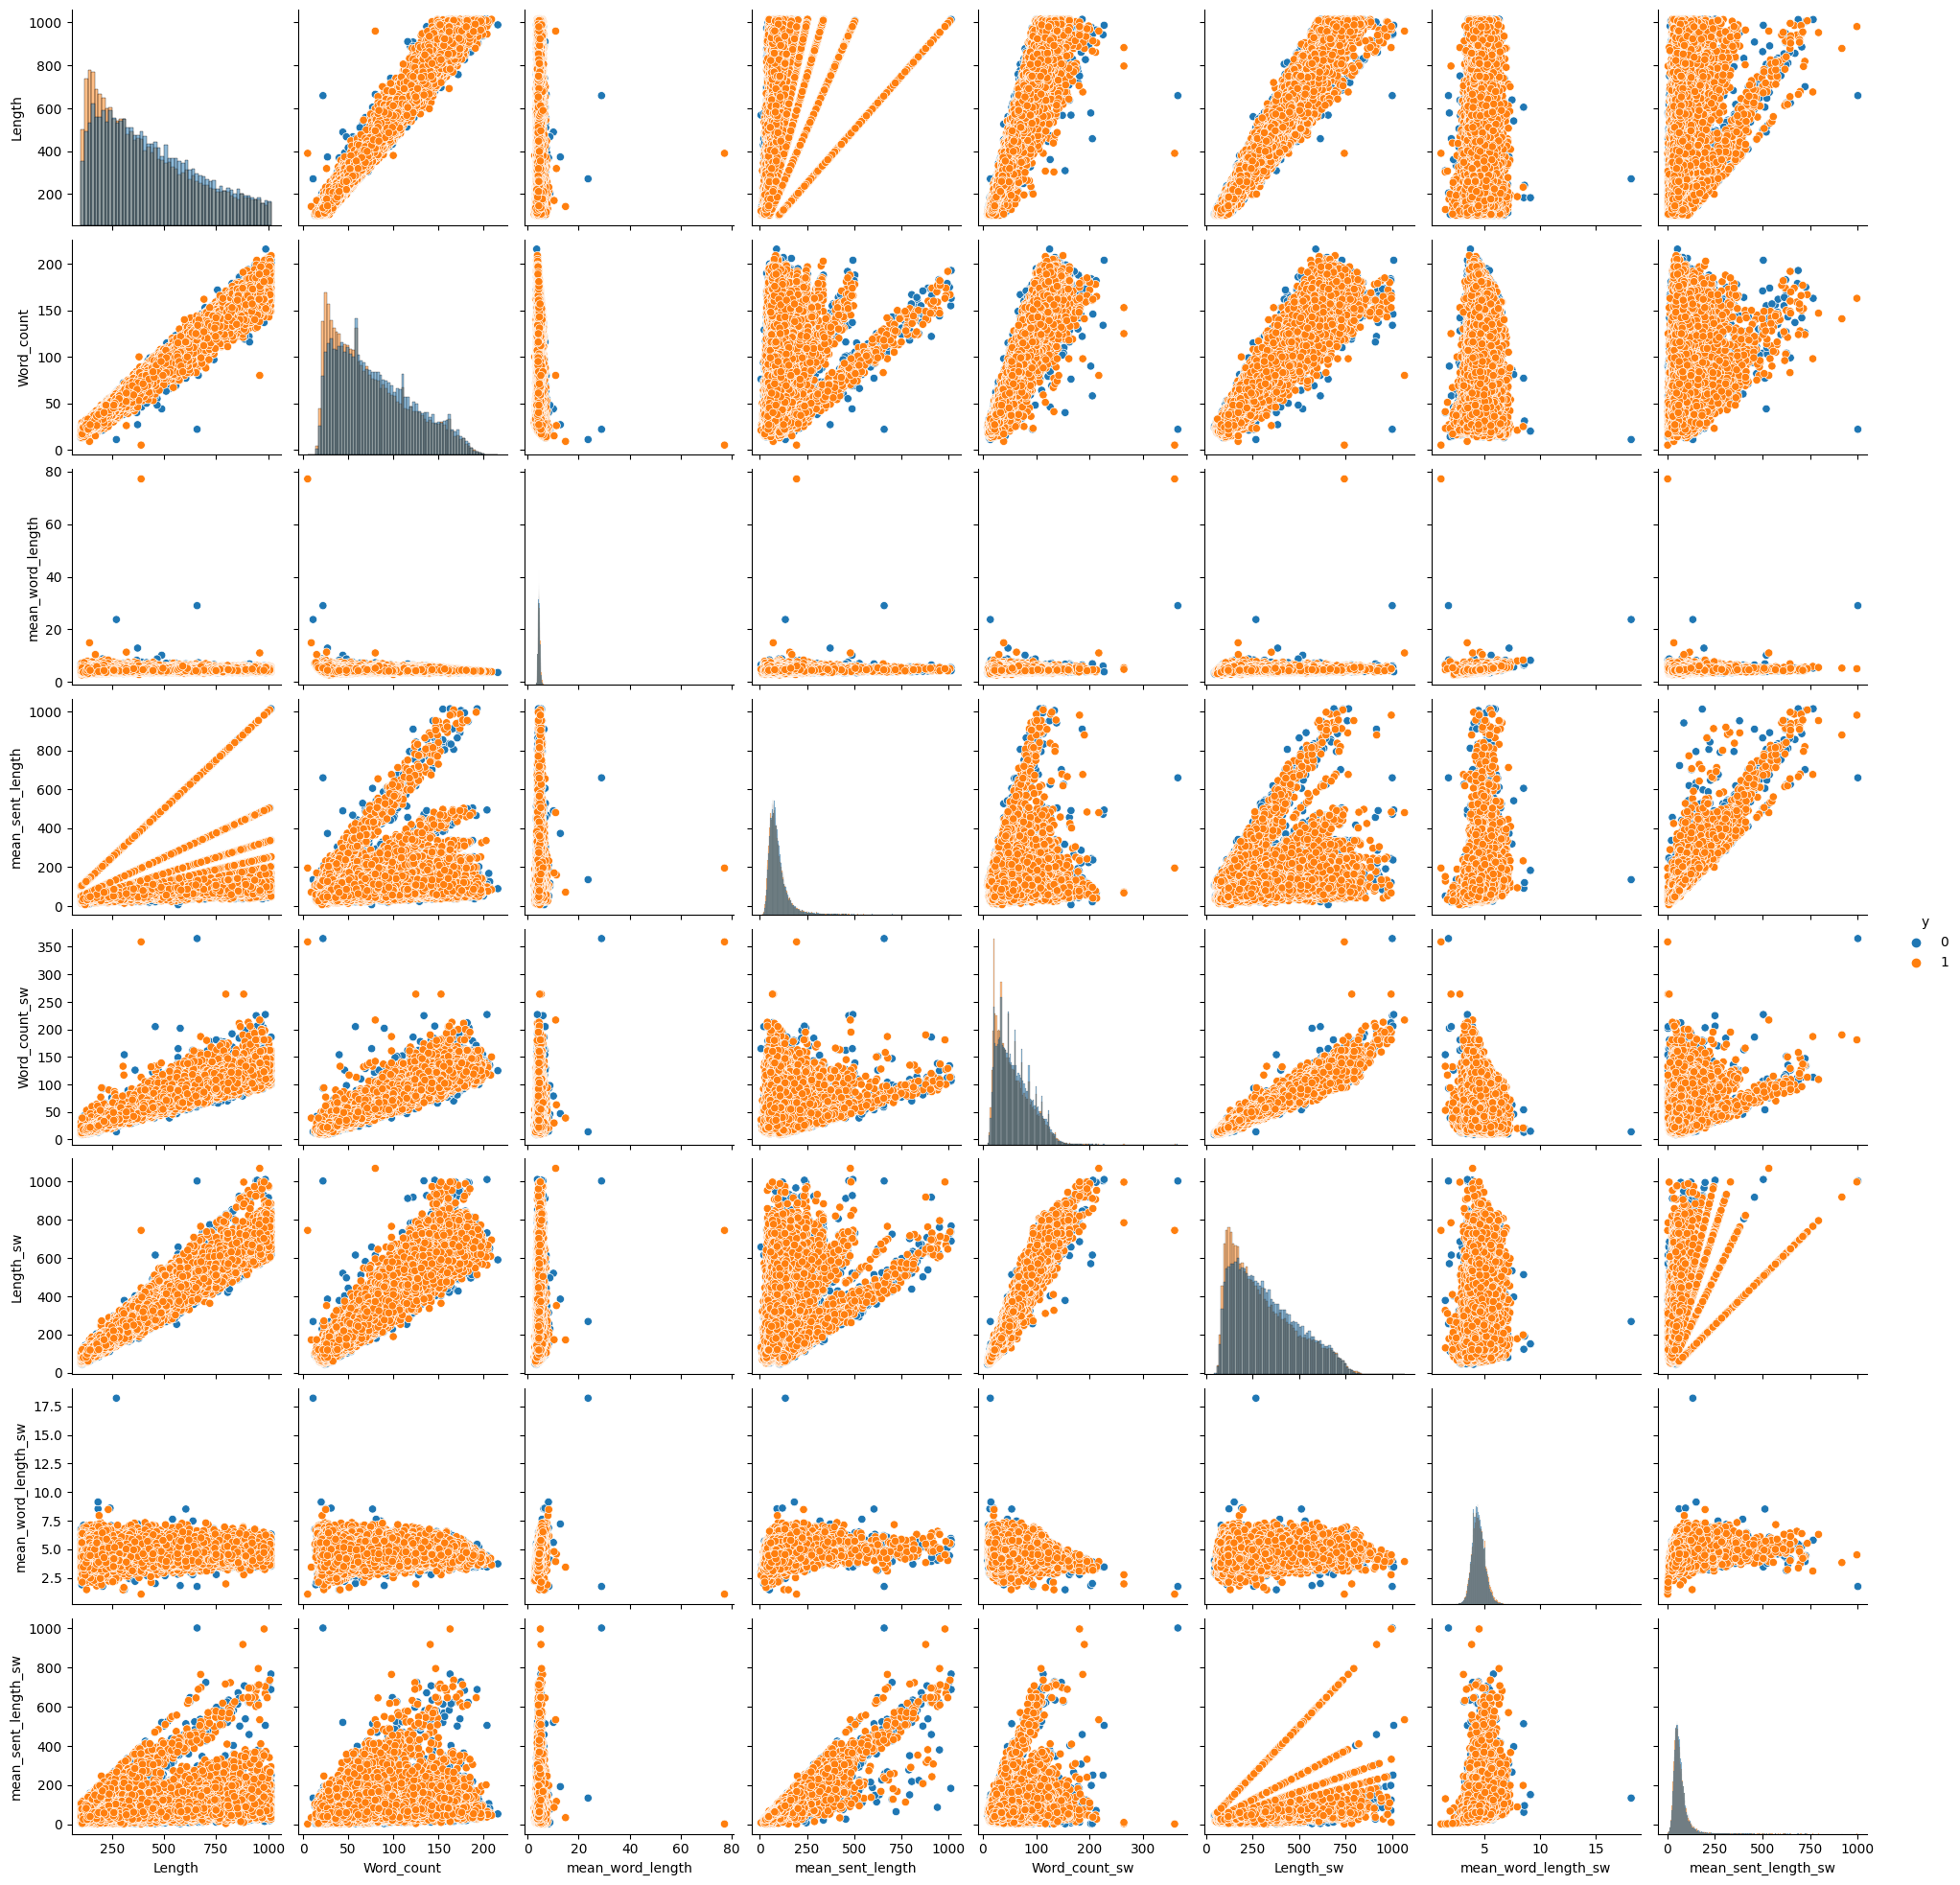

In [ ]:
sns.pairplot(balanced_df, hue="y", diag_kind="hist")


In [ ]:
balanced_df.corr()

,y,Length,Word_count,mean_word_length,mean_sent_length,Word_count_sw,Length_sw,mean_word_length_sw,mean_sent_length_sw
y,1.000000,-0.064801,-0.069282,0.026775,-0.008372,-0.061868,-0.053773,0.033410,0.007271
Length,-0.064801,1.000000,0.989683,0.069747,0.276618,0.964626,0.984943,0.221463,0.254387
Word_count,-0.069282,0.989683,1.000000,-0.038023,0.249194,0.958001,0.960007,0.137005,0.217341
mean_word_length,0.026775,0.069747,-0.038023,1.000000,0.147549,0.072844,0.148578,0.552546,0.206457
mean_sent_length,-0.008372,0.276618,0.249194,0.147549,1.000000,0.203966,0.269299,0.369584,0.937754
Word_count_sw,-0.061868,0.964626,0.958001,0.072844,0.203966,1.000000,0.979029,0.059780,0.195066
Length_sw,-0.053773,0.984943,0.960007,0.148578,0.269299,0.979029,1.000000,0.233524,0.268177
mean_word_length_sw,0.033410,0.221463,0.137005,0.552546,0.369584,0.059780,0.233524,1.000000,0.414300
mean_sent_length_sw,0.007271,0.254387,0.217341,0.206457,0.937754,0.195066,0.268177,0.414300,1.000000


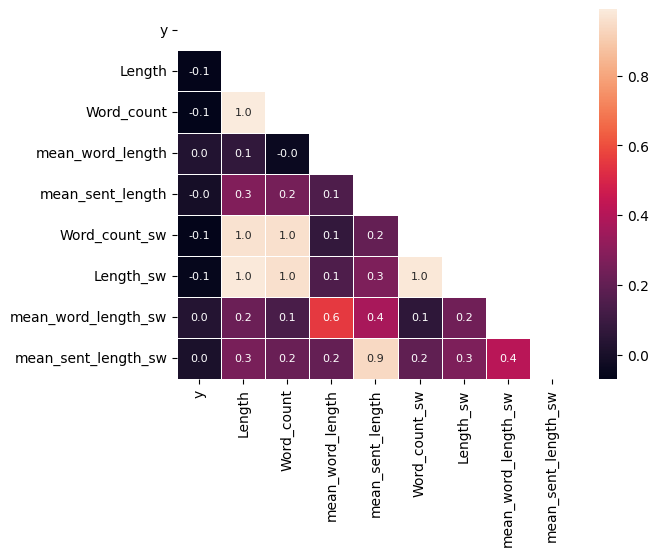

In [ ]:
trimask = np.triu(np.ones_like(balanced_df.corr(), dtype=bool))
ax = sns.heatmap(balanced_df.corr(), annot=True,  linewidth=.5,fmt=".1f", annot_kws = {'size' : 8}, mask=trimask )


In [ ]:
balanced_df_1 = balanced_df.loc[:, ['y', 'Length', 'Word_count', 'mean_word_length', 'mean_sent_length'] ]
balanced_df_1['tipo'] = 'crudo'
balanced_df_2 = balanced_df.loc[:, ['y', 'Word_count_sw', 'Length_sw', 'mean_word_length_sw', 'mean_sent_length_sw'] ].rename(columns= dict(zip ([ 'Word_count_sw', 'Length_sw', 'mean_word_length_sw', 'mean_sent_length_sw'],
                                                                                                                                                      [ 'Word_count','Length',  'mean_word_length', 'mean_sent_length'] )))
balanced_df_2['tipo'] = 'no_sw'
balance_df_3 = pd.concat([balanced_df_1, balanced_df_2], axis =0 )
balance_df_3.head()

,y,Length,Word_count,mean_word_length,mean_sent_length,tipo
3187481,0,376,74,4.094595,74.600000,crudo
1130758,0,954,156,5.121795,135.428571,crudo
3400483,0,583,114,4.122807,96.333333,crudo
1110090,0,621,102,5.098039,88.000000,crudo
2743912,0,466,80,4.837500,76.833333,crudo


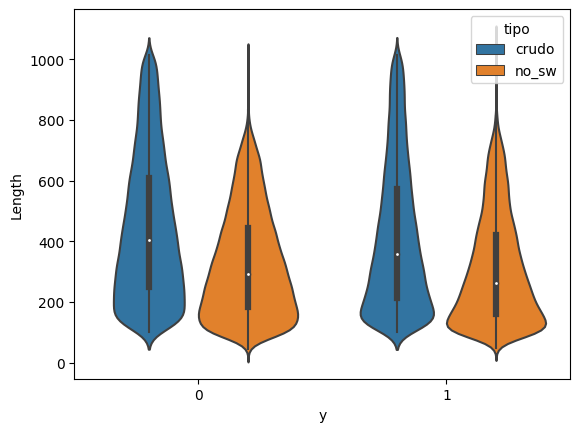

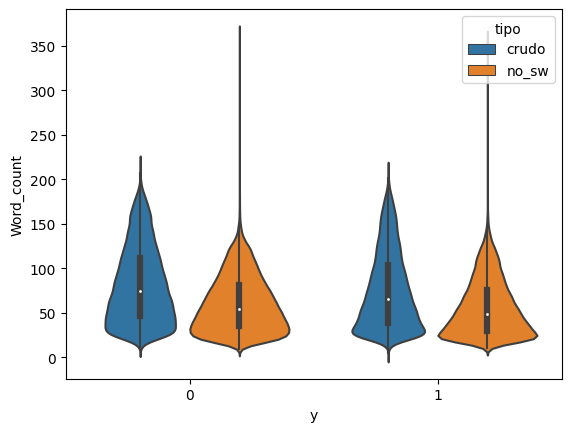

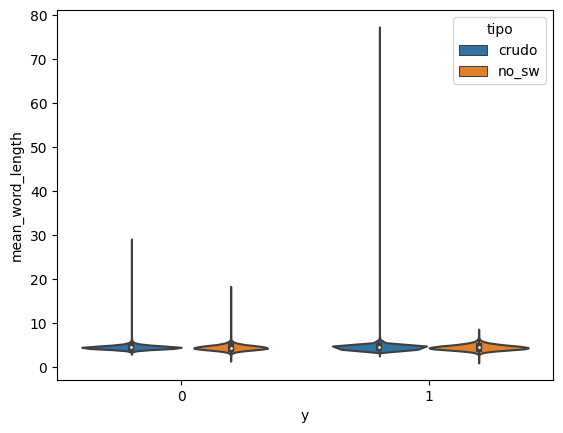

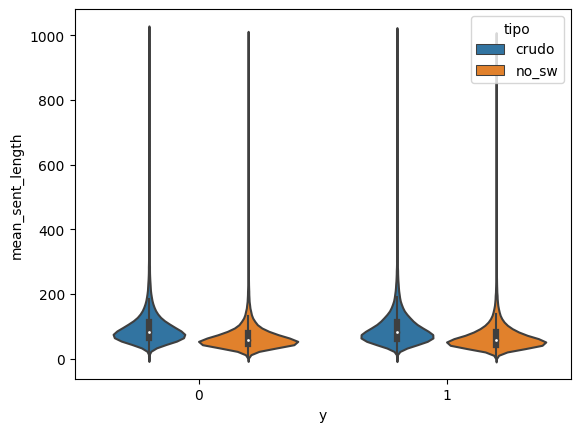

In [ ]:
for col in [ 'Length', 'Word_count', 'mean_word_length', 'mean_sent_length']:
  plt.figure()
  sns.violinplot(data=balance_df_3, x="y", y=col, hue="tipo")

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.util import bigrams
import networkx as nx


# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
balanced_df=data.groupby('y',as_index = False,group_keys=False).apply(lambda s: s.sample(2,replace=True))


In [55]:
balanced_df.head()

,Unnamed: 0.1,Unnamed: 0,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw,Length_sw,mean_word_length_sw,mean_sent_length_sw
703120,703120,703120,Not a Great Choice: I have 2 of these monitors...,0,808,151,4.357616,88.888889,Not Great Choice : I 2 monitors . We received ...,108,570,4.287037,62.444444
935252,935252,935252,Beware of McFarland Alien figures: I just purc...,0,393,72,4.472222,64.666667,Beware McFarland Alien figures : I purchased e...,54,300,4.574074,49.166667
3264287,3264287,3264287,Good relaxation appliance: I received this pro...,1,292,54,4.425926,96.666667,Good relaxation appliance : I received product...,35,204,4.857143,67.333333
2287720,2287720,2287720,Great Book!: This book is great. I was attract...,1,454,94,3.840426,56.000000,Great Book ! : This book great . I attracted f...,67,311,3.656716,38.000000


In [56]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
balanced_df['x1'] = balanced_df['no_stopwords'].str.lower()  # Convert to lowercase
balanced_df['x1'] = balanced_df['x1'].str.replace(r'[^\w\s]', '')  # Remove punctuation
balanced_df['x1'] = balanced_df['x1'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))  # Remove stopwords


<ipython-input-56-0d5ceb2fb6d1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  balanced_df['x1'] = balanced_df['x1'].str.replace(r'[^\w\s]', '')  # Remove punctuation


In [57]:
balanced_df.head()

,Unnamed: 0.1,Unnamed: 0,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw,Length_sw,mean_word_length_sw,mean_sent_length_sw,x1
703120,703120,703120,Not a Great Choice: I have 2 of these monitors...,0,808,151,4.357616,88.888889,Not Great Choice : I 2 monitors . We received ...,108,570,4.287037,62.444444,great choice 2 monitors received first one sho...
935252,935252,935252,Beware of McFarland Alien figures: I just purc...,0,393,72,4.472222,64.666667,Beware McFarland Alien figures : I purchased e...,54,300,4.574074,49.166667,beware mcfarland alien figures purchased every...
3264287,3264287,3264287,Good relaxation appliance: I received this pro...,1,292,54,4.425926,96.666667,Good relaxation appliance : I received product...,35,204,4.857143,67.333333,good relaxation appliance received product wit...
2287720,2287720,2287720,Great Book!: This book is great. I was attract...,1,454,94,3.840426,56.000000,Great Book ! : This book great . I attracted f...,67,311,3.656716,38.000000,great book book great attracted front cover go...


In [58]:
balanced_df.shape

(4, 14)

In [59]:
# Create a list of bigrams for each review
bigram_list = [list(bigrams(review.split())) for review in balanced_df['x1']]

# Flatten the list of bigrams
flat_bigram_list = [bigram for sublist in bigram_list for bigram in sublist]

# Create a frequency distribution of bigrams
bigram_freq = nltk.FreqDist(flat_bigram_list)

In [60]:
len(bigram_freq)

174

In [61]:
# Select bigrams that occur at least n times (you can adjust 'n' as needed)
n = 2
filtered_bigrams = [bigram for bigram in bigram_freq.items() if bigram[1] >= n]


In [62]:
filtered_bigrams[:10], len(filtered_bigrams)

([(('sound', 'quality'), 3),
  (('months', 'stopped'), 2),
  (('stopped', 'working'), 2),
  (('alien', 'figure'), 2),
  (('get', 'stand'), 2)],
 5)

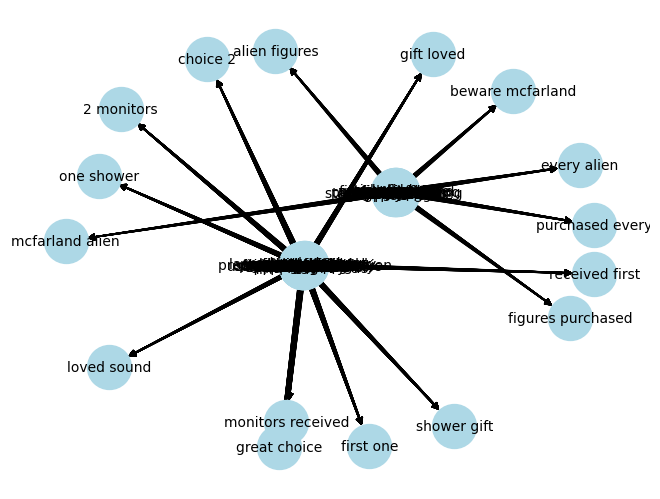

In [63]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (bigrams) to the graph
for bigram, freq in filtered_bigrams:
    G.add_node(' '.join(bigram), frequency=freq)

# Add edges between bigrams based on their co-occurrence
for review_bigrams in bigram_list:
    for bigram in review_bigrams:
        if ' '.join(bigram) in G:
            for next_bigram in review_bigrams:
                if bigram != next_bigram:
                    G.add_edge(' '.join(bigram), ' '.join(next_bigram))

# Draw the bigram graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, node_color='lightblue')
plt.show()


# Limpieza de datos

* Normalize Text
* Remove Unicode Characters
* Remove Stopwords
* Perform Stemming and Lemmatization

from https://monkeylearn.com/blog/text-cleaning/

In [7]:
import re

import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
display(data.head())
print(data.shape)

,Unnamed: 0.1,Unnamed: 0,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw
0,0,0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.00,Stuning even non-gamer : This sound track beau...,58
1,1,1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.75,The best soundtrack ever anything . : I 'm rea...,67
2,2,2,Amazing!: This soundtrack is my favorite music...,1,760,129,4.899225,189.50,Amazing ! : This soundtrack favorite music tim...,115
3,3,3,Excellent Soundtrack: I truly like this soundt...,1,743,118,5.305085,185.00,Excellent Soundtrack : I truly like soundtrack...,112
4,4,4,"Remember, Pull Your Jaw Off The Floor After He...",1,481,87,4.540230,95.40,"Remember , Pull Your Jaw Off The Floor After H...",77


(4000000, 10)


In [85]:
# lst_texts=[]
# for i in range( 0 , len(data)):
#   text = data.loc[0,'x']
#   text = text.lower()
#   text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
#   text = " ".join([word for word in text.split() if word not in (stop)])
#   text1 = " ".join([stemmer.stem(word) for word in text.split()  ])
#   text2 = " ".join([lemmatizer.lemmatize(word) for word in text.split()  ])




In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Preprocess your stopwords outside the loop for efficiency
stop = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Initialize an empty list to store the preprocessed texts
lst_texts = []

In [10]:
import datetime



In [103]:
4e5

400000.0

In [11]:


def data_prep_batch(inicia, termina):

  # Initialize an empty list to store the preprocessed texts
  lst_texts = []
  # Iterate through the data
  for i in range(inicia , termina):
    text = data.loc[i, 'x']  # Use i instead of 0 to get data for each row

    # Preprocess the text
    text = text.lower()
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)

    # Split the text into words and apply stopword removal, stemming, and lemmatization
    words = text.split()
    filtered_words = [word for word in words if word not in stop]
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Join the processed words back into a single string
    text1 = " ".join(stemmed_words)
    text2 = " ".join(lemmatized_words)

    # Append the preprocessed texts to the list
    lst_texts.append([text, text1, text2])
    if i%100000 == 0:
      print(i)

  df_lst_texts = pd.DataFrame(data= lst_texts, columns =['text_12','text_stemmed', 'text_lemm'])
  return df_lst_texts

now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))# 5 minutos por 400 000

Current date and time : 
2023-10-15 15:25:09


In [16]:
lst_df_texts =[]
step =int(4e5)
for i in range(0 , int(4e6), step ):
    # print(i ,step+i )
  now = datetime.datetime.now()
  print ("Current date and time : ")
  print (now.strftime("%Y-%m-%d %H:%M:%S"))
  df = data_prep_batch(i ,i +step )
  lst_df_texts.append(df)



Current date and time : 
2023-10-15 15:27:17
0
100000
200000
300000
Current date and time : 
2023-10-15 15:37:25
400000
500000
600000
700000
Current date and time : 
2023-10-15 15:47:20
800000
900000
1000000
1100000
Current date and time : 
2023-10-15 15:57:09
1200000
1300000
1400000
1500000
Current date and time : 
2023-10-15 16:07:00
1600000
1700000
1800000
1900000
Current date and time : 
2023-10-15 16:16:46
2000000
2100000
2200000
2300000
Current date and time : 
2023-10-15 16:26:13
2400000
2500000
2600000
2700000
Current date and time : 
2023-10-15 16:35:35
2800000
2900000
3000000
3100000
Current date and time : 
2023-10-15 16:44:59
3200000
3300000
3400000
3500000
Current date and time : 
2023-10-15 16:54:24
3600000
3700000
3800000
3900000


In [17]:
df_preprocesed = pd.concat(lst_df_texts)
df_preprocesed.to_csv('resultados_20231014.csv')

In [18]:

df_preprocesed.to_csv(path_root + 'resultados_20231014.csv')

In [21]:
df_preprocesed

,text_12,text_stemmed,text_lemm
0,stuning even for the nongamer this sound track...,stune even nongam sound track beauti paint sen...,stuning even nongamer sound track beautiful pa...
1,the best soundtrack ever to anything im readin...,best soundtrack ever anyth im read lot review ...,best soundtrack ever anything im reading lot r...
2,amazing this soundtrack is my favorite music o...,amaz soundtrack favorit music time hand intens...,amazing soundtrack favorite music time hand in...
3,excellent soundtrack i truly like this soundtr...,excel soundtrack truli like soundtrack enjoy v...,excellent soundtrack truly like soundtrack enj...
4,remember pull your jaw off the floor after hea...,rememb pull jaw floor hear youv play game know...,remember pull jaw floor hearing youve played g...
...,...,...,...
399995,unbelievable in a bad way we bought this thoma...,unbeliev bad way bought thoma son huge thoma f...,unbelievable bad way bought thomas son huge th...
399996,almost great until it broke my son recieved th...,almost great broke son reciev birthday gift 2 ...,almost great broke son recieved birthday gift ...
399997,disappointed i bought this toy for my son who...,disappoint bought toy son love thoma toy need ...,disappointed bought toy son love thomas toy ne...
399998,classic jessica mitford this is a compilation ...,classic jessica mitford compil wide rang mitfo...,classic jessica mitford compilation wide range...


In [22]:
data

,Unnamed: 0.1,Unnamed: 0,x,y,Length,Word_count,mean_word_length,mean_sent_length,no_stopwords,Word_count_sw
0,0,0,Stuning even for the non-gamer: This sound tra...,1,426,80,4.337500,60.000000,Stuning even non-gamer : This sound track beau...,58
1,1,1,The best soundtrack ever to anything.: I'm rea...,1,509,97,4.257732,126.750000,The best soundtrack ever anything . : I 'm rea...,67
2,2,2,Amazing!: This soundtrack is my favorite music...,1,760,129,4.899225,189.500000,Amazing ! : This soundtrack favorite music tim...,115
3,3,3,Excellent Soundtrack: I truly like this soundt...,1,743,118,5.305085,185.000000,Excellent Soundtrack : I truly like soundtrack...,112
4,4,4,"Remember, Pull Your Jaw Off The Floor After He...",1,481,87,4.540230,95.400000,"Remember , Pull Your Jaw Off The Floor After H...",77
...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,399995,Unbelievable- In a Bad Way: We bought this Tho...,0,866,158,4.487342,172.400000,Unbelievable- In Bad Way : We bought Thomas so...,107
3999996,3999996,399996,"Almost Great, Until it Broke...: My son reciev...",0,614,118,4.211864,86.857143,"Almost Great , Until Broke ... : My son reciev...",86
3999997,3999997,399997,Disappointed !!!: I bought this toy for my son...,0,591,120,3.933333,65.000000,Disappointed ! ! ! : I bought toy son loves ``...,80
3999998,3999998,399998,Classic Jessica Mitford: This is a compilation...,1,243,41,4.951220,121.000000,Classic Jessica Mitford : This compilation wid...,33


In [ ]:
data